<a href="https://colab.research.google.com/github/DeveshValluru/DeepLearningProjects/blob/main/CommentToxicityModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np


In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle competitions download -c jigsaw-toxic-comment-classification-challenge

 95% 50.0M/52.6M [00:00<00:00, 79.2MB/s]
100% 52.6M/52.6M [00:00<00:00, 73.0MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/jigsaw-toxic-comment-classification-challenge.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
zip_ref = zipfile.ZipFile('/content/train.csv.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
df = pd.read_csv('/content/train.csv')

In [7]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [8]:
df.tail()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [9]:
df.iloc[0]['comment_text']

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [10]:
df[df.columns[2:]].iloc[5]

toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
Name: 5, dtype: int64

**PREPROCESS THE COMMENTS TO FEED IT TO THE DEEP LEARNING MODEL**

In [11]:
from tensorflow.keras.layers import TextVectorization

In [12]:
X = df['comment_text']
Y = df[df.columns[2:]].values

In [13]:
X

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

In [14]:
Y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [15]:
MAX_FEATURES = 200000 #number of words in the vocab

In [16]:
from pandas.core.internals.managers import T
vectorizer = TextVectorization(max_tokens = MAX_FEATURES, output_sequence_length=1800, output_mode='int')

In [17]:
vectorizer.adapt(X.values)

In [18]:
vectorizer.get_vocabulary()

['',
 '[UNK]',
 'the',
 'to',
 'of',
 'and',
 'a',
 'you',
 'i',
 'is',
 'that',
 'in',
 'it',
 'for',
 'this',
 'not',
 'on',
 'be',
 'as',
 'have',
 'are',
 'your',
 'with',
 'if',
 'article',
 'was',
 'or',
 'but',
 'page',
 'my',
 'an',
 'from',
 'by',
 'do',
 'at',
 'about',
 'me',
 'so',
 'wikipedia',
 'can',
 'what',
 'there',
 'all',
 'has',
 'will',
 'talk',
 'please',
 'would',
 'its',
 'no',
 'one',
 'just',
 'like',
 'they',
 'he',
 'dont',
 'which',
 'any',
 'been',
 'should',
 'more',
 'we',
 'some',
 'other',
 'who',
 'see',
 'here',
 'also',
 'his',
 'think',
 'im',
 'because',
 'know',
 'how',
 'am',
 'people',
 'why',
 'edit',
 'articles',
 'only',
 'out',
 'up',
 'when',
 'were',
 'use',
 'then',
 'may',
 'time',
 'did',
 'them',
 'now',
 'being',
 'their',
 'than',
 'thanks',
 'even',
 'get',
 'make',
 'good',
 'had',
 'very',
 'information',
 'does',
 'could',
 'well',
 'want',
 'such',
 'sources',
 'way',
 'name',
 'these',
 'deletion',
 'pages',
 'first',
 'help'

In [19]:
vectorized_text = vectorizer(X.values)

In [20]:
vectorized_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]])>

In [21]:
vectorized_text.shape

TensorShape([159571, 1800])

In [22]:
X.shape

(159571,)

In [23]:
#creating a dataset pipeline

dataset = tf.data.Dataset.from_tensor_slices((vectorized_text,Y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8)

In [24]:
dataset.as_numpy_iterator().next()

(array([[    2,  4295,    11, ...,     0,     0,     0],
        [   39,    57,  3692, ...,     0,     0,     0],
        [16369,  2792,   124, ...,     0,     0,     0],
        ...,
        [ 1144,    12,     8, ...,     0,     0,     0],
        [  729,   799,  2664, ...,     0,     0,     0],
        [  797,   149,     2, ...,     0,     0,     0]]),
 array([[0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]))

In [25]:
train = dataset.take(int(len(dataset)*.7))
val =  dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test =  dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [26]:
print('length of train is:', len(train))
print('length of train is:', len(val))
print('length of train is:', len(test))


length of train is: 6981
length of train is: 1994
length of train is: 997


In [27]:
train_generator = train.as_numpy_iterator()

In [28]:
train_generator.next()

(array([[ 50359,      8,     39, ...,      0,      0,      0],
        [     1,     23,      2, ...,      0,      0,      0],
        [   265,    214,      2, ...,      0,      0,      0],
        ...,
        [    73,     33,   1480, ...,      0,      0,      0],
        [     8,    710, 123933, ...,      0,      0,      0],
        [    21,   2707,    124, ...,      0,      0,      0]]),
 array([[1, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]))

**CREATING THE SEQUENTIAL MODEL**

In [29]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [30]:
model = Sequential()

model.add(Embedding(MAX_FEATURES+1,32))
model.add(Bidirectional(LSTM(32,activation='tanh')))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='sigmoid'))

In [31]:
model.compile(loss='BinaryCrossentropy',optimizer='Adam')

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [33]:
history = model.fit(train,epochs=10,validation_data=val)

Epoch 1/10
6981/6981 [==============================] - 693s 98ms/step - loss: 0.0623 - val_loss: 0.0494
Epoch 2/10
6981/6981 [==============================] - 576s 82ms/step - loss: 0.0458 - val_loss: 0.0424
Epoch 3/10
6981/6981 [==============================] - 568s 81ms/step - loss: 0.0410 - val_loss: 0.0358
Epoch 4/10
6981/6981 [==============================] - 575s 82ms/step - loss: 0.0361 - val_loss: 0.0316
Epoch 5/10
6981/6981 [==============================] - 571s 82ms/step - loss: 0.0329 - val_loss: 0.0307
Epoch 6/10
6981/6981 [==============================] - 570s 82ms/step - loss: 0.0292 - val_loss: 0.0265
Epoch 7/10
6981/6981 [==============================] - 566s 81ms/step - loss: 0.0266 - val_loss: 0.0244
Epoch 8/10
6981/6981 [==============================] - 563s 81ms/step - loss: 0.0245 - val_loss: 0.0211
Epoch 9/10
6981/6981 [==============================] - 567s 81ms/step - loss: 0.0220 - val_loss: 0.0189
Epoch 10/10
6981/6981 [==============================] 

In [34]:
history.history

{'loss': [0.062300171703100204,
  0.045752380043268204,
  0.040979430079460144,
  0.03611515462398529,
  0.032886289060115814,
  0.02919844351708889,
  0.026593171060085297,
  0.0244835764169693,
  0.022040503099560738,
  0.020079247653484344],
 'val_loss': [0.04943792149424553,
  0.042395275086164474,
  0.035763930529356,
  0.031615231186151505,
  0.030699700117111206,
  0.026482805609703064,
  0.024382364004850388,
  0.02106003649532795,
  0.018886270001530647,
  0.017431609332561493]}

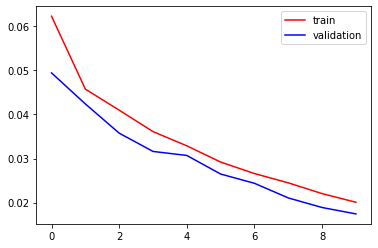

In [35]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

**MAKE PREDICTIONS**

In [36]:
batch = test.as_numpy_iterator().next()

In [37]:
input_text = vectorizer('You freaking suck')

In [38]:
model.predict(np.expand_dims(input_text,0))

1/1 [==============================] - 1s 745ms/step


array([[0.99960774, 0.4593734 , 0.99677163, 0.00565197, 0.87129456,
        0.01313813]], dtype=float32)

In [39]:
res = model.predict(np.expand_dims(input_text,0))

1/1 [==============================] - 0s 54ms/step


In [40]:
batch = test.as_numpy_iterator().next()

In [41]:
batch_X, batch_Y = test.as_numpy_iterator().next()

In [42]:
model.predict(batch_X)

1/1 [==============================] - 0s 64ms/step


array([[6.41442732e-10, 4.88876272e-33, 9.27284638e-12, 1.56425234e-20,
        1.10817943e-11, 6.32839702e-15],
       [2.55245922e-08, 1.96605007e-28, 6.08365414e-10, 3.26342046e-18,
        1.01609376e-09, 2.27784507e-13],
       [8.32862222e-14, 0.00000000e+00, 3.69119303e-16, 3.46897223e-30,
        2.39198425e-16, 3.42107215e-22],
       [4.20952847e-06, 5.95068175e-20, 8.23617015e-08, 1.14359243e-11,
        3.10829449e-07, 1.04523386e-08],
       [1.00125180e-05, 9.63686817e-19, 2.32382149e-07, 4.04697734e-11,
        8.25385200e-07, 3.01271612e-08],
       [3.34047655e-12, 0.00000000e+00, 1.30101660e-14, 6.21581656e-26,
        1.68645937e-14, 5.04048400e-19],
       [2.51194336e-07, 5.10220245e-24, 5.95835870e-09, 1.97375871e-14,
        1.36477167e-08, 1.54499261e-10],
       [2.06468540e-04, 1.22246533e-13, 5.08125850e-05, 2.26520420e-08,
        4.50975494e-05, 4.56897124e-06],
       [9.52528179e-01, 6.09751169e-06, 1.35344733e-03, 3.49383801e-04,
        7.06520723e-03, 

In [43]:
(model.predict(batch_X)>0.5).astype(int)

1/1 [==============================] - 0s 63ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

Evaluate the model

In [44]:
batch_Y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [45]:
from keras.metrics import Precision, Recall, CategoricalAccuracy

In [46]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [47]:
for batch in test.as_numpy_iterator():
  X_true,Y_true = batch
  y_pred = model.predict(X_true)

  Y_true = Y_true.flatten()
  y_pred = y_pred.flatten()

  pre.update_state(Y_true,y_pred)
  re.update_state(Y_true,y_pred)
  acc.update_state(Y_true,y_pred)

1/1 [==============================] - 0s 55ms/step


In [48]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 0.927943766117096, Recall: 0.9069567918777466, Accuracy: 0.49548646807670593
